<a href="https://colab.research.google.com/github/Sanazdalvandi/Colab/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
!pip install wfdb
import librosa as lr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
import pathlib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import shutil
import cv2
import wave
import struct
import pywt
from scipy.signal import find_peaks_cwt
from keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import Callback
from keras.models import load_model,Sequential
from keras import losses
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
import datetime
from scipy.io import wavfile
import sys
from scipy.signal import butter, filtfilt
import librosa, IPython.display, time, pywt
import librosa.display
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical, plot_model
from glob import glob
from scipy import signal
import os
from scipy.signal import find_peaks
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras import losses
import os
import os.path
import glob
from tensorflow.keras.preprocessing.text import Tokenizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
text="I like mybrothet.Go home!.Do you like my brother?"
sentences=text.split('.')
print(sentences)
tokenizer = Tokenizer(num_words=100, oov_token='<oov>')


['I like mybrothet', 'Go home!', 'Do you like my brother?']


In [ ]:
tokenizer.fit_on_texts(sentences)
print(tokenizer.word_index)


{'<oov>': 1, 'like': 2, 'i': 3, 'mybrothet': 4, 'go': 5, 'home': 6, 'do': 7, 'you': 8, 'my': 9, 'brother': 10}


In [ ]:
sequences=tokenizer.texts_to_sequences(sentences)
print(sentences)


['I like mybrothet', 'Go home!', 'Do you like my brother?']


In [ ]:
new_sentences=["I like my sister"]
new_sentences=tokenizer.texts_to_sequences(new_sentences)
print(new_sentences)


[[3, 2, 9, 1]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequences=pad_sequences(sequences)
print(padded_sequences)



[[ 0  0  3  2  4]
 [ 0  0  0  5  6]
 [ 7  8  2  9 10]]


In [ ]:
from tensorflow.keras.layers import TextVectorization


In [ ]:
text_vectorization=TextVectorization()
text_vectorization.adapt(sentences)
print(text_vectorization.get_vocabulary())


['', '[UNK]', 'like', 'you', 'mybrothet', 'my', 'i', 'home', 'go', 'do', 'brother']


In [ ]:
encoded_sequences=text_vectorization(sentences)
print(encoded_sequences)


tf.Tensor(
[[ 6  2  4  0  0]
 [ 8  7  0  0  0]
 [ 9  3  2  5 10]], shape=(3, 5), dtype=int64)


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json



--2024-01-05 11:21:03--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.91, 172.217.12.27, 172.217.15.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  14.8MB/s    in 0.4s    

2024-01-05 11:21:04 (14.8 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
df=pd.read_json('sarcasm.json')
df.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df.shape


(26709, 3)

In [ ]:
sentences=df['headline'].to_list()
labels=df['is_sarcastic'].to_list()


In [ ]:
from tensorflow.keras.layers import TextVectorization
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
sw = set(stopwords.words('english'))

print(sw)

for s in sentences[:2]:
    print(s)

for i in range(len(sentences)):
    words = sentences[i].split()
    words_new = [w for w in words if w.lower() not in sw]  # Use lowercase to match stopwords
    sentences[i] = ' '.join(words_new)
training_size = 23000
train_sentences = sentences[:training_size]
validation_sentences = sentences[training_size:]
train_labels = labels[:training_size]
validation_labels = labels[training_size:]
train_labels=np.array(train_labels)
validation_labels=np.array(validation_labels)

vocab_size=5000
embedding_dim=16
text_vectorization = TextVectorization(max_tokens=vocab_size,output_sequence_length=25)
text_vectorization.adapt(train_sentences)  # Use adapt method on the TextVectorization instance
print(len(text_vectorization.get_vocabulary()))
train_sequences=text_vectorization(train_sentences)
validation_sequences=text_vectorization(validation_sentences)
print(type(train_sequences))
print(train_sequences.shape)
print(validation_sequences.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'s', 'nor', 'wouldn', 'was', "aren't", 'needn', "hadn't", 've', 'the', "don't", 'through', 'about', 'why', 'because', "mightn't", 'ours', 'an', 'me', 'is', 'whom', 'haven', 'before', 'but', 'while', 'at', "won't", 'should', 'just', 'll', 'into', 'hers', 'your', 'under', 'than', 'how', 'didn', "hasn't", "mustn't", "weren't", 'weren', 'for', 'again', 'doesn', 'most', 'will', "doesn't", 'above', "shan't", 'him', 'it', 'as', 'won', 'by', 'and', 'ma', 'those', 'out', 'are', 'further', 'not', 'over', 'am', 'his', 'on', "wouldn't", 'to', "that'll", 'were', 'their', 'o', 'itself', 'this', "didn't", 'until', 'which', 'during', 'too', 'below', 'its', 'that', 't', 'what', 're', "you'll", 'ain', 'here', 'down', 'there', "should've", 'mightn', 'herself', "you've", 'such', 'if', 'very', 'themselves', "couldn't", 'then', 'a', 'i', 'don', 'these', 'theirs', 'm', 'no', "it's", 'where', 'or', 'doing', 'other', 'be', 'off', 'hasn', 'had', 'you', "wasn't", 'has', 'did', 'her', 'can', 'we', 'do', 'after',

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model1=Sequential([
    layers.Embedding(vocab_size,embedding_dim),
    layers.GlobalAveragePooling1D() ,
    layers.Dense(1,activation='sigmoid'),
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          80000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 80017 (312.57 KB)
Trainable params: 80017 (312.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

adam = Adam(learning_rate=0.0001)

model1 = Sequential([
    Embedding(vocab_size, embedding_dim),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid'),
])

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(train_sequences, train_labels,batch_size=128, epochs=50, validation_data=(validation_sequences, validation_labels))

Epoch 1/50
180/180 [==============================] - 1s 4ms/step - loss: 0.6903 - accuracy: 0.5597 - val_loss: 0.6877 - val_accuracy: 0.5700
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5597 - val_loss: 0.6842 - val_accuracy: 0.5700
Epoch 3/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5597 - val_loss: 0.6813 - val_accuracy: 0.5700
Epoch 4/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6815 - accuracy: 0.5597 - val_loss: 0.6790 - val_accuracy: 0.5700
Epoch 5/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.5598 - val_loss: 0.6770 - val_accuracy: 0.5700
Epoch 6/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.5598 - val_loss: 0.6751 - val_accuracy: 0.5697
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6755 - accuracy: 0.5599 - val_loss: 0.6733 - val_accuracy: 0.5697
Epoch 

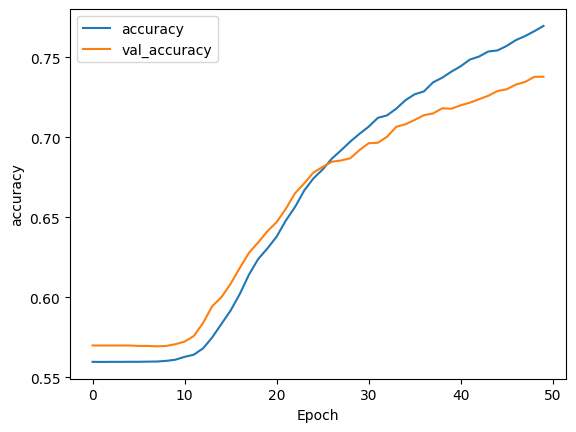

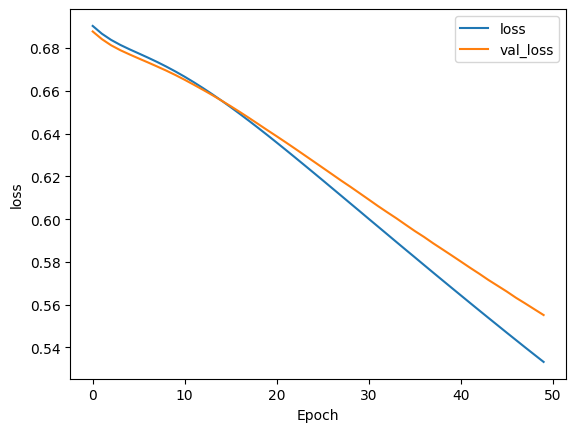

In [ ]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()
plot_graphs(history1,"accuracy")
plot_graphs(history1,"loss")


In [ ]:
sentences = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "TensorFlow book will be a best seller"]
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded)
print(model.predict(padded))

NameError: name 'tokenizer' is not defined